## <b> [3단계] AI 모델링
---

## 1, 2 단계에서 진행하신 내용을 아래에 그대로 진행해주세요.

---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [ ]:
#Tensorflow 설치하기

* 데이터 프레임 관련 라이브러리

In [132]:
#라이브러리 불러오기

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_tree

from sklearn.model_selection import *

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

### **나.  학습데이터 불러오기**

In [10]:
data = pd.read_csv('train_dataset.csv').set_index('Unnamed: 0').reset_index(drop=True)
data.shape

(3664, 24)

### **다.  데이터 전처리**

In [11]:
target = 'Result_v1'

In [15]:
data.drop_duplicates(inplace=True)
data.shape

(3233, 24)

In [16]:
data.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [18]:
data.dropna(inplace=True)
data.shape

(3231, 24)

In [19]:
data = data.loc[:, data.nunique() != 1]
data.shape

(3231, 22)

### **라. train_test_split을 이용하여 train/test  데이터 분리**



In [20]:
X = data.drop(target, axis=1)
y = data.loc[:, target]

In [21]:
# train_test_split 사용

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.3)

In [23]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(2261, 21) (970, 21) (2261,) (970,)


### **마. Confusion Matrix 함수 정의**


#### Confusion Matrix란 Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표입니다.
#### 아래 함수는 이번 과제에서 confusion matrix 결과를 보기 쉽게 표현한 것으로 사용 예를 참고하여 모델 결과 확인에 사용하시기 바랍니다.



**<span style="color:green">[참고링크] 공식 Document**</span>
 
* confusion matrix(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [24]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [25]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

### <span style="color:blue">[예시] Confusion Matrix 사용 방법<span>

- 샘플
#### > confusion = confusion_matrix(test_y, dt_pred)
#### > fig, ax = plt.subplots(figsize=(10,3))
#### > plot_confusion_matrix(ax, confusion, fontsize=30)


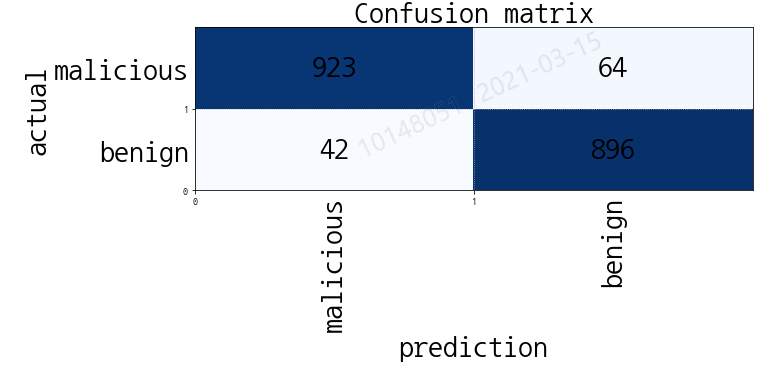

---

## <b> Q. AI 분류 모델 만들기

* 전처리한 데이터셋을 활용해 악성사이트 여부를 판별하는 AI 분류 모델을 <font color="red">최소 3개 이상 </font>만들어보세요.

In [60]:
# 1. import
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import *


In [30]:
# 2.선언 

logistic_model = LogisticRegression()
KNN_model = KNeighborsClassifier()
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()


In [35]:
# 3. fit(), 학습

pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
param = {'kneighborsclassifier__n_neighbors': [3, 4, 5, 7, 10], 'kneighborsclassifier__metric': ['minkowski', 'cityblock', 'chevyshev']}

KNN_model = GridSearchCV(pipe, param_grid=param, cv=5, n_jobs=-1, ).fit(X_train, y_train)

C:\Users\allsa\anaconda3\envs\kt-aivle\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\allsa\anaconda3\envs\kt-aivle\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\allsa\anaconda3\envs\kt-aivle\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\allsa\anaconda3\envs\kt-aivle\lib\site-packages\sklearn\neighbors\_classification.py", line 207, in 

In [36]:
rf_model = RandomForestClassifier(n_jobs=-1).fit(X_train, y_train)

In [56]:

params = {'max_depth': range(2, 9), 'n_estimators': range(50, 100, 10), 'learning_rate': list(np.linspace(0.001, 0.2, 100))}
xgb_model = GridSearchCV(estimator=XGBClassifier(), param_grid=params, n_jobs=4, cv=5, verbose=3).fit(X_train, y_train)

Fitting 5 folds for each of 3500 candidates, totalling 17500 fits
[21:59:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\allsa\anaconda3\envs\kt-aivle\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\allsa\anaconda3\envs\kt-aivle\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [57]:
# 4. predict(), 예측

print(f'KNN: {KNN_model.score(X_val, y_val)}')
print(f'RF : {rf_model.score(X_val, y_val)}')
print(f'XGB: {xgb_model.score(X_val, y_val)}')

KNN: 0.8824742268041237
RF : 0.9587628865979382
XGB: 0.9649484536082474


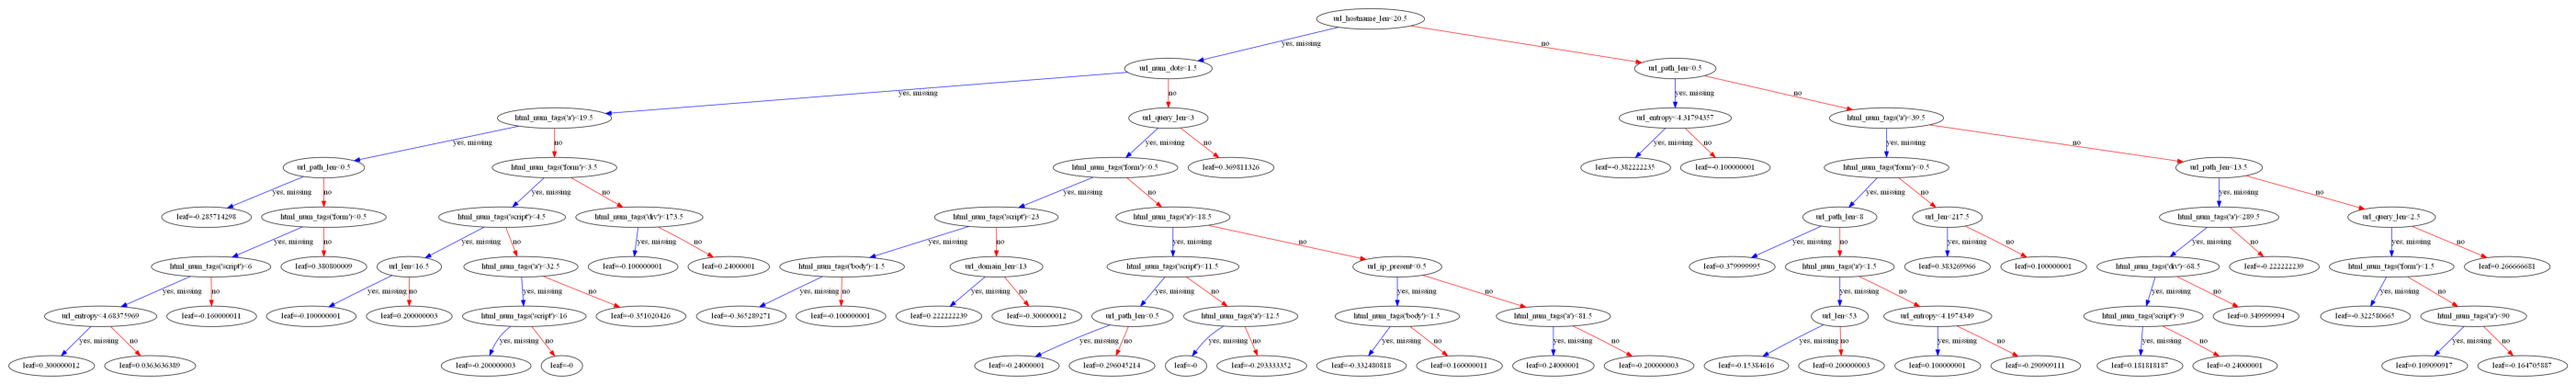

In [69]:
# train 및 val 데이터 정확도 확인 
plt.rcParams['figure.figsize'] = (50, 40)
plot_tree(xgb_model.best_estimator_, num_trees = 0)
plt.show()

In [73]:
# Test 데이터 결과 Confusion Matrix 확인

print(f'KNN\n{confusion_matrix(y_val, KNN_model.predict(X_val))}\n')
print(f'RF\n{confusion_matrix(y_val, rf_model.predict(X_val))}\n')
print(f'XGB\n{confusion_matrix(y_val, xgb_model.predict(X_val))}\n')


KNN
[[416  58]
 [ 56 440]]

RF
[[460  14]
 [ 26 470]]

XGB
[[462  12]
 [ 22 474]]



In [78]:
# Feature(특징)별 가중치 확인

print(f'KNN: {creport(y_val, KNN_model.predict(X_val))}')
print('-'*50)
print(f'RF : {creport(y_val, rf_model.predict(X_val))}')
print('-'*50)
print(f'XGB: {creport(y_val, xgb_model.predict(X_val))}')

KNN:               precision    recall  f1-score   support

      benign       0.88      0.88      0.88       474
   malicious       0.88      0.89      0.89       496

    accuracy                           0.88       970
   macro avg       0.88      0.88      0.88       970
weighted avg       0.88      0.88      0.88       970

--------------------------------------------------
RF :               precision    recall  f1-score   support

      benign       0.95      0.97      0.96       474
   malicious       0.97      0.95      0.96       496

    accuracy                           0.96       970
   macro avg       0.96      0.96      0.96       970
weighted avg       0.96      0.96      0.96       970

--------------------------------------------------
XGB:               precision    recall  f1-score   support

      benign       0.95      0.97      0.96       474
   malicious       0.98      0.96      0.97       496

    accuracy                           0.96       970
   macro av

In [76]:
from sklearn.metrics import *

In [80]:
print(f'KNN\n{f1_score(y_val, KNN_model.predict(X_val), pos_label="benign")}\n')
print(f'RF\n{f1_score(y_val, rf_model.predict(X_val), pos_label="benign")}\n')
print(f'XGB\n{f1_score(y_val, xgb_model.predict(X_val), pos_label="benign")}\n')

KNN
0.8794926004228331

RF
0.9583333333333334

XGB
0.9645093945720251



In [81]:
xgb_model.predict(X_val)

array(['malicious', 'malicious', 'benign', 'malicious', 'malicious',
       'malicious', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malicious', 'benign', 'benign', 'benign',
       'malicious', 'malicious', 'benign', 'malicious', 'benign',
       'benign', 'benign', 'malicious', 'benign', 'benign', 'benign',
       'benign', 'malicious', 'malicious', 'malicious', 'benign',
       'benign', 'malicious', 'benign', 'benign', 'benign', 'malicious',
       'benign', 'benign', 'malicious', 'malicious', 'benign',
       'malicious', 'malicious', 'benign', 'malicious', 'benign',
       'malicious', 'benign', 'malicious', 'benign', 'benign',
       'malicious', 'benign', 'malicious', 'malicious', 'malicious',
       'benign', 'malicious', 'benign', 'benign', 'malicious',
       'malicious', 'benign', 'malicious', 'benign', 'benign',
       'malicious', 'benign', 'benign', 'malicious', 'malicious',
       'malicious', 'benign', 'malicious', 'benign', 'benign',


In [124]:
test = pd.read_csv('test_dataset_v01.csv', index_col='Unnamed: 0')

test.nunique()

url_len                     203
url_num_hyphens_dom           7
url_path_len                157
url_domain_len               56
url_hostname_len             57
url_num_dots                 16
url_num_underscores          16
url_query_len                57
url_num_query_para            9
url_ip_present                2
url_entropy                1791
url_chinese_present           1
url_port                      2
html_num_tags('iframe')       9
html_num_tags('script')      64
html_num_tags('embed')        4
html_num_tags('object')       6
html_num_tags('div')        256
html_num_tags('head')         4
html_num_tags('body')         4
html_num_tags('form')        10
html_num_tags('a')          240
html_num_tags('applet')       1
dtype: int64

In [127]:
test = test.loc[:, test.nunique() != 1]

In [109]:
X1 = X.loc[:, test.isna().sum() == 0]
X1.shape

(3231, 15)

In [110]:
X1.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
dtype: int64

In [111]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y)

In [112]:
# 3. fit(), 학습

pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
param = {'kneighborsclassifier__n_neighbors': [3, 4, 5, 7, 10], 'kneighborsclassifier__metric': ['minkowski', 'cityblock', 'chevyshev']}

KNN_model = GridSearchCV(pipe, param_grid=param, cv=5, n_jobs=-1, ).fit(X1_train, y1_train)

C:\Users\allsa\anaconda3\envs\kt-aivle\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\allsa\anaconda3\envs\kt-aivle\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\allsa\anaconda3\envs\kt-aivle\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\allsa\anaconda3\envs\kt-aivle\lib\site-packages\sklearn\neighbors\_classification.py", line 207, in 

In [113]:
rf_model = RandomForestClassifier(n_jobs=-1).fit(X1_train, y1_train)

In [118]:

params = {'max_depth': range(2, 9), 'n_estimators': range(50, 100, 10), 'learning_rate': list(np.linspace(0.001, 0.2, 100))}
xgb_model = GridSearchCV(estimator=XGBClassifier(), param_grid=params, n_jobs=4, cv=5, verbose=3).fit(X1_train, y1_train)

Fitting 5 folds for each of 3500 candidates, totalling 17500 fits
[10:36:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\allsa\anaconda3\envs\kt-aivle\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\allsa\anaconda3\envs\kt-aivle\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [120]:
print(f'KNN\n{f1_score(y1_val, KNN_model.predict(X1_val), pos_label="benign")}\n')
print(f'RF\n{f1_score(y1_val, rf_model.predict(X1_val), pos_label="benign")}\n')
print(f'XGB\n{f1_score(y1_val, xgb_model.predict(X1_val), pos_label="benign")}\n')

KNN
0.8120300751879699

RF
0.8542199488491048

XGB
0.8653366583541147



In [129]:
pred = xgb_model.predict(test.loc[:, test.isna().sum() == 0])

In [137]:
submit = pd.DataFrame({'id':range(len(pred)), 'expected': pred})
submit

,id,expected
0,0,benign
1,1,benign
2,2,benign
3,3,malicious
4,4,malicious
...,...,...
2436,2436,benign
2437,2437,malicious
2438,2438,benign
2439,2439,malicious


In [139]:
submit['expected'].replace({'benign':1, 'malicious': -1}, inplace=True)
submit

,id,expected
0,0,1
1,1,1
2,2,1
3,3,-1
4,4,-1
...,...,...
2436,2436,1
2437,2437,-1
2438,2438,1
2439,2439,-1


In [141]:
submit.to_csv('submit1.csv', index=False)

In [ ]:
submit = pd.DataFrame({'id':range(len(pred)), 'expected': pred})
submit.to_csv('submit.csv', index=False)

In [143]:
from xgboost import *

In [145]:
gpu = XGBClassifier(tree_method='gpu_hist', gpu_id=0).fit(X_train, y_train)

C:\Users\allsa\anaconda3\envs\kt-aivle\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\allsa\anaconda3\envs\kt-aivle\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBoostError: [14:41:31] c:\windows\temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\common\common.h:157: XGBoost version not compiled with GPU support.